# Project Report: Data Visualizations
Cassady Jackson and Baylie Schnieder

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import re
from collections import Counter

In [109]:
top_ten = pd.read_csv('TopTenStates.csv')
bottom_ten = pd.read_csv('BottomTen.csv')
top_25 = pd.read_csv('Top25.csv')
bottom_25 = pd.read_csv('Bottom25.csv')
ageadj = pd.read_csv('AgeAdjustedRate.csv')
cruderate = pd.read_csv('CrudeRate.csv')

## Bar Plot for States with Highest Ranking vs Rate of Cardiovascular Disease

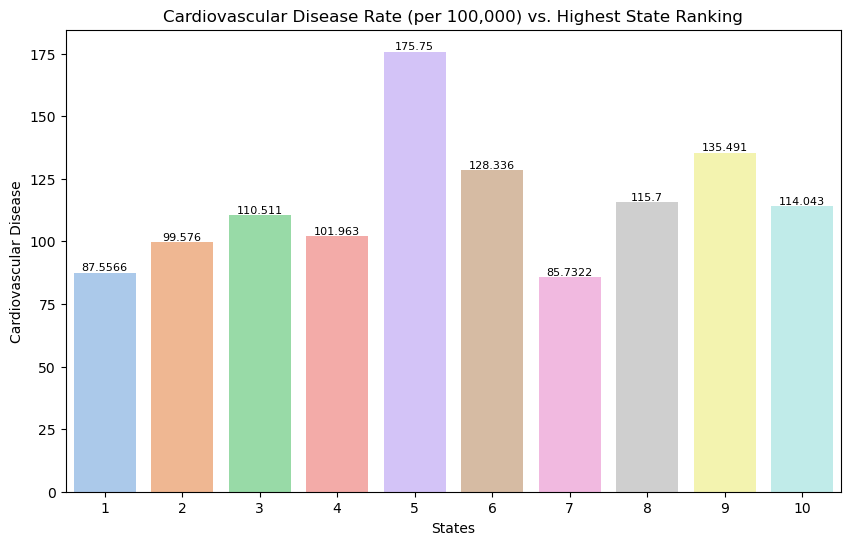

In [64]:
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=top_ten['Overall Public School Rank 2021'], y=top_ten['DataValue'], errorbar=None, palette='pastel', hue=top_ten['Overall Public School Rank 2021'], legend=False)
plt.title('Cardiovascular Disease Rate (per 100,000) vs. Highest State Ranking')
plt.xlabel('States')
plt.ylabel('Cardiovascular Disease')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('top_10_rates.jpg', dpi=300)
plt.show()

### Bar Plot for States with Lowest Ranking vs Cardiovascular Disease

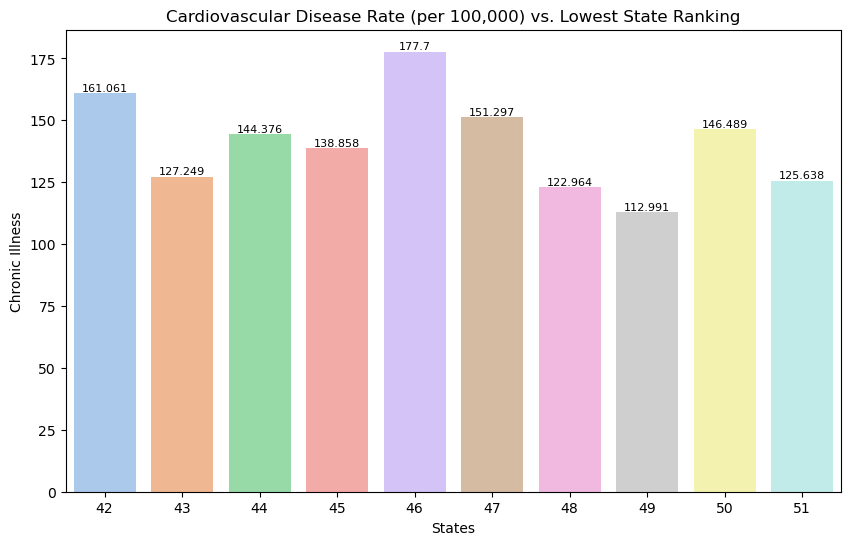

In [66]:
#bottom_ten = bottom_ten.groupby('Overall Public School Rank 2022')
plt.figure(figsize=(10, 6)) # size of the plot in inches (width, height)
ax = sns.barplot(x=bottom_ten['Overall Public School Rank 2021'], y=bottom_ten['DataValue'], errorbar=None, palette='pastel', hue=bottom_ten['Overall Public School Rank 2021'], legend=False)
plt.title('Cardiovascular Disease Rate (per 100,000) vs. Lowest State Ranking')
plt.xlabel('States')
plt.ylabel('Chronic Illness')
plt.grid(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.savefig('bottom_10_rates.jpg', dpi=300)
plt.show()

In [47]:
state_data = pd.read_csv('State_Unique_Data.csv')

In [48]:
def bottom_25(state):
    if state <= 25:
        return 'Top'
    else:
        return 'Bottom'

state_data['Ranking Level'] = state_data['Overall Public School Rank 2021'].apply(bottom_25)

display(state_data.head(1))

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2021,Higher Ed Quality 2021,School Safety Rank 2021,Ranking Level
0,2021,AL,Alabama,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,5.6,5.6,...,1,CVD,CVD08,CRDRATE,AGE,AGE0_44,44,46,17,Bottom


In [49]:
bottom_data = state_data.copy()
bottom_data = bottom_data.drop(bottom_data[bottom_data['Ranking Level'] != 'Bottom'].index)
display(bottom_data)

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2021,Higher Ed Quality 2021,School Safety Rank 2021,Ranking Level
0,2021,AL,Alabama,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,5.6,5.6,...,1,CVD,CVD08,CRDRATE,AGE,AGE0_44,44,46,17,Bottom
1,2021,AL,Alabama,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,22.1,22.1,...,1,CVD,CVD09,CRDRATE,AGE,AGE0_44,44,46,17,Bottom
2,2021,AL,Alabama,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Age-adjusted Rate,85.8,85.8,...,1,CVD,CVD08,AGEADJRATE,RACE,BLK,44,46,17,Bottom
3,2021,AL,Alabama,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Age-adjusted Rate,58.0,58.0,...,1,CVD,CVD07,AGEADJRATE,SEX,SEXM,44,46,17,Bottom
4,2021,AL,Alabama,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,273.2,273.2,...,1,CVD,CVD09,CRDRATE,RACE,BLK,44,46,17,Bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,2021,WV,West Virginia,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,192.6,192.6,...,54,CVD,CVD08,CRDRATE,OVERALL,OVR,39,45,7,Bottom
2491,2021,TN,Tennessee,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,175.9,175.9,...,47,CVD,CVD09,AGEADJRATE,SEX,SEXF,35,31,45,Bottom
2495,2021,WV,West Virginia,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Age-adjusted Rate,175.5,175.5,...,54,CVD,CVD08,AGEADJRATE,SEX,SEXM,39,45,7,Bottom
2496,2021,TX,Texas,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,230.9,230.9,...,48,CVD,CVD09,AGEADJRATE,RACE,BLK,28,30,13,Bottom


In [50]:
top_data = state_data.copy()
top_data = top_data.drop(top_data[top_data['Ranking Level'] != 'Top'].index)

In [93]:
display(state_data[state_data['State'] == 'Arizona'])

,YearEnd,LocationAbbr,State,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Overall Public School Rank 2021,Higher Ed Quality 2021,School Safety Rank 2021,Ranking Level,cleaned_state
57,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,45.8,45.8,...,CVD,CVD07,CRDRATE,OVERALL,OVR,49,50,31,Bottom,arizona
64,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,1.5,1.5,...,CVD,CVD07,CRDRATE,AGE,AGE0_44,49,50,31,Bottom,arizona
66,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Age-adjusted Rate,35.6,35.6,...,CVD,CVD07,AGEADJRATE,SEX,SEXM,49,50,31,Bottom,arizona
68,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,144.3,144.3,...,CVD,CVD09,AGEADJRATE,RACE,MRC,49,50,31,Bottom,arizona
83,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Age-adjusted Rate,196.4,196.4,...,CVD,CVD09,AGEADJRATE,RACE,BLK,49,50,31,Bottom,arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,49.6,49.6,...,CVD,CVD07,CRDRATE,SEX,SEXF,49,50,31,Bottom,arizona
399,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,200.0,200.0,...,CVD,CVD09,CRDRATE,OVERALL,OVR,49,50,31,Bottom,arizona
404,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Age-adjusted Rate,74.1,74.1,...,CVD,CVD08,AGEADJRATE,RACE,HIS,49,50,31,Bottom,arizona
411,2021,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,192.2,192.2,...,CVD,CVD09,CRDRATE,RACE,HAPI,49,50,31,Bottom,arizona


In [75]:
def preprocess_row(row):
    text = row['State']
    if not isinstance(text, str):
        return ""
    text = text.lower().strip()
    text = text.replace(" ", "_")
    return text + " "

state_data['cleaned_state'] = state_data.apply(preprocess_row, axis=1)

# change it so that when it is running through it is just the row rather than the whole thing

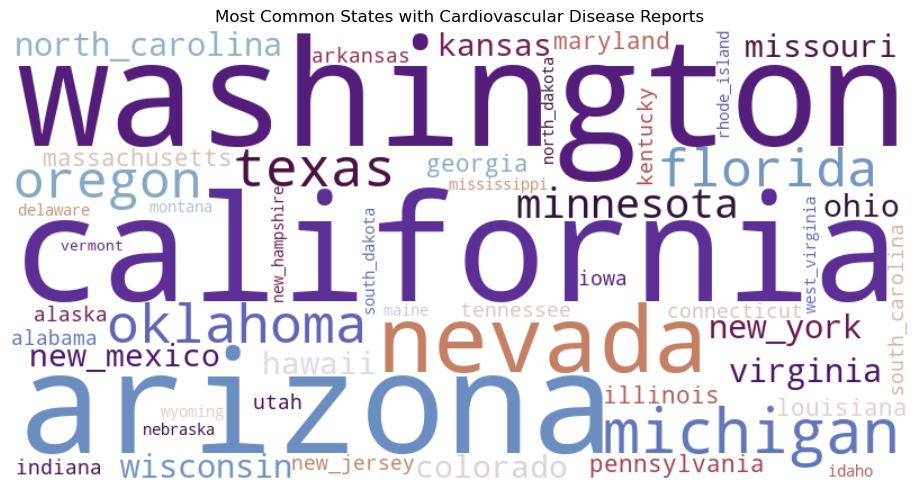

In [83]:
alltext = ' '.join(state_data['cleaned_state']).strip()

wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap='twilight_shifted',
    collocations=False
).generate(alltext)

wordcloud.words_= {word.replace('_',' '): value
                   for word, value in wordcloud.words_.items()}

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common States with Cardiovascular Disease Reports')
plt.tight_layout()
plt.savefig('common_states.jpg', dpi=300)
plt.show()

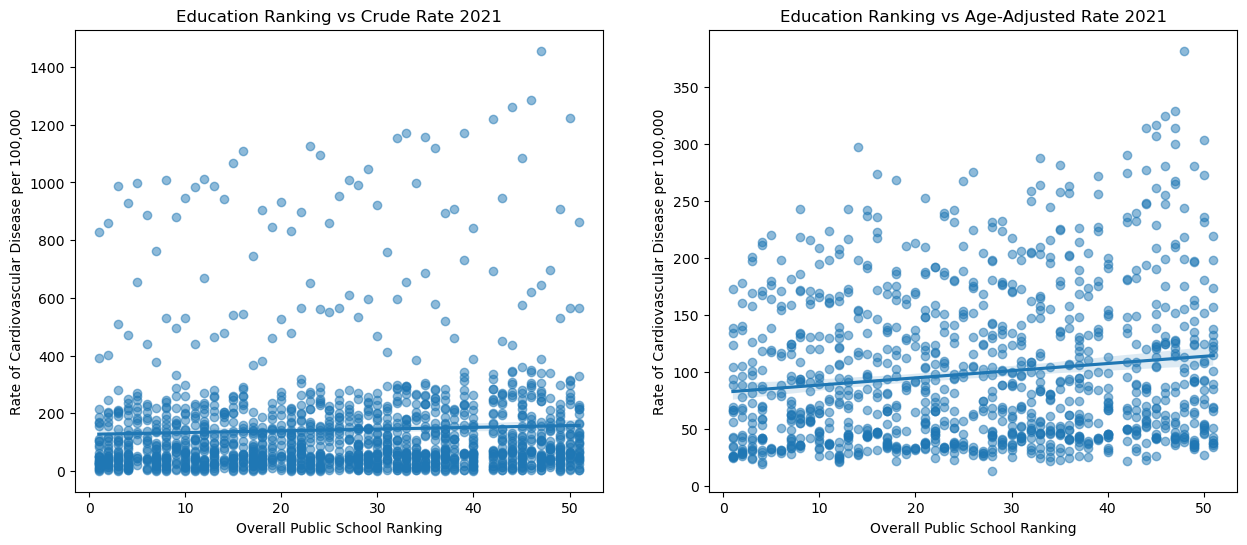

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Crude rate plot
sns.regplot(data=cruderate, x='Overall Public School Rank 2021', y='DataValue',
            ax=ax1, scatter_kws={'alpha':0.5})
ax1.set_title('Education Ranking vs Crude Rate 2021')
ax1.set_xlabel('Overall Public School Ranking')
ax1.set_ylabel('Rate of Cardiovascular Disease per 100,000')

# Age-adjusted rate plot
sns.regplot(data=ageadj, x='Overall Public School Rank 2021', y='DataValue',
            ax=ax2, scatter_kws={'alpha':0.5})
ax2.set_title('Education Ranking vs Age-Adjusted Rate 2021')
ax2.set_xlabel('Overall Public School Ranking')
ax2.set_ylabel('Rate of Cardiovascular Disease per 100,000')

plt.savefig('agevscruderate.jpg', dpi=300)
plt.show()

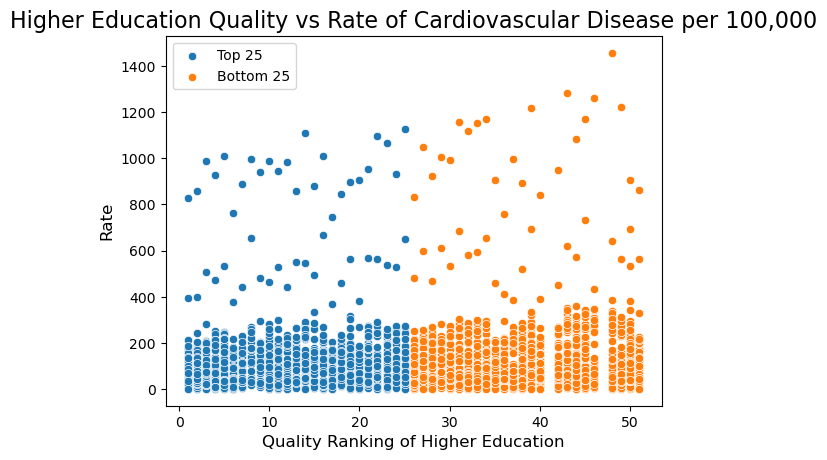

In [107]:
sns.scatterplot(data=top_25, x='Higher Ed Quality 2021', y='DataValue', label='Top 25')
sns.scatterplot(data=bottom_25, x='Higher Ed Quality 2021', y='DataValue', label='Bottom 25')


# add titles and labels
plt.title("Higher Education Quality vs Rate of Cardiovascular Disease per 100,000", fontsize=16)
plt.xlabel("Quality Ranking of Higher Education", fontsize=12)
plt.ylabel("Rate", fontsize=12)
plt.savefig('highered.jpg', dpi=300)
plt.show()